In [4]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import warnings


In [5]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [6]:
null_value = pd.DataFrame()
null_value['variable'] = test_data.columns
null_value['Train'] = train_data.drop(labels='SalePrice', axis=1).isnull().sum().to_list()
null_value['Test'] = test_data.isnull().sum().to_list()
null_value

,variable,Train,Test
0,Id,0,0
1,MSSubClass,0,0
2,MSZoning,0,4
3,LotFrontage,259,227
4,LotArea,0,0
...,...,...,...
75,MiscVal,0,0
76,MoSold,0,0
77,YrSold,0,0
78,SaleType,0,1


In [7]:
no_null_col = null_value[(null_value['Train']==0) & (null_value['Test']==0)].variable.to_list()

In [8]:
df_train = train_data[no_null_col]
df_train['SalePrice'] = train_data['SalePrice']
df_test = test_data[no_null_col]
df_test.describe().T

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\2801459933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SalePrice'] = train_data['SalePrice']


,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.5,2190.0,2554.5,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.0,50.0,70.0,190.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.0,1973.0,2001.0,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.0,1992.0,2004.0,2010.0
1stFlrSF,1459.0,1156.534613,398.165820,407.0,873.5,1079.0,1382.5,5095.0
2ndFlrSF,1459.0,325.967786,420.610226,0.0,0.0,0.0,676.0,1862.0
LowQualFinSF,1459.0,3.543523,44.043251,0.0,0.0,0.0,0.0,1064.0


C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


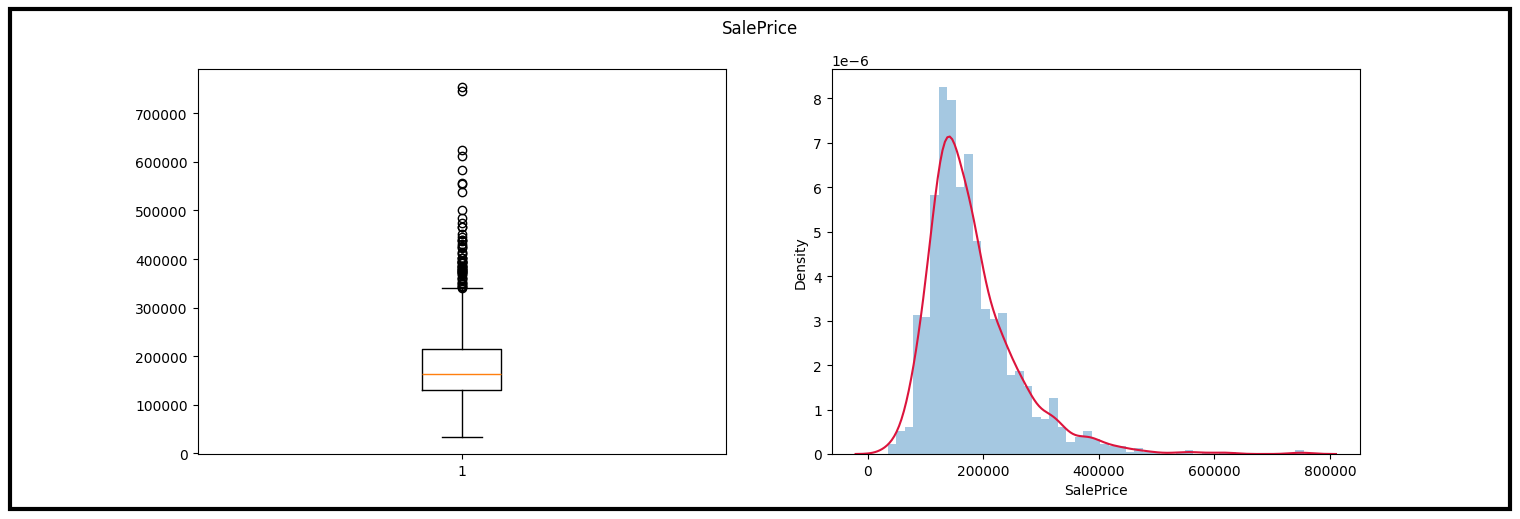

In [9]:
def plot_hist_box(data):
    fig, axis = plt.subplots(1,2,figsize=(15,5))
    plt.suptitle(data.name)
    axis[0].boxplot(data)
    axis[1] = sns.distplot(data)
    axis[1].lines[0].set_color('crimson')
    rect = plt.Rectangle(
        (0,0),1,1,fill=False, color="k", lw=3, transform=fig.transFigure, figure=fig
    )
    fig.patches.extend([rect])
    plt.show()

plot_hist_box(df_train.SalePrice)

In [10]:
df_train['House_Age'] = df_train.YrSold - df_train.YearBuilt
df_train['RemodAge']  = df_train.YrSold - df_train.YearRemodAdd
df_train.drop(labels=['YrSold','YearBuilt','YearRemodAdd'],inplace=True,axis=1)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3482038859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['House_Age'] = df_train.YrSold - df_train.YearBuilt
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3482038859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RemodAge']  = df_train.YrSold - df_train.YearRemodAdd
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3482038859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


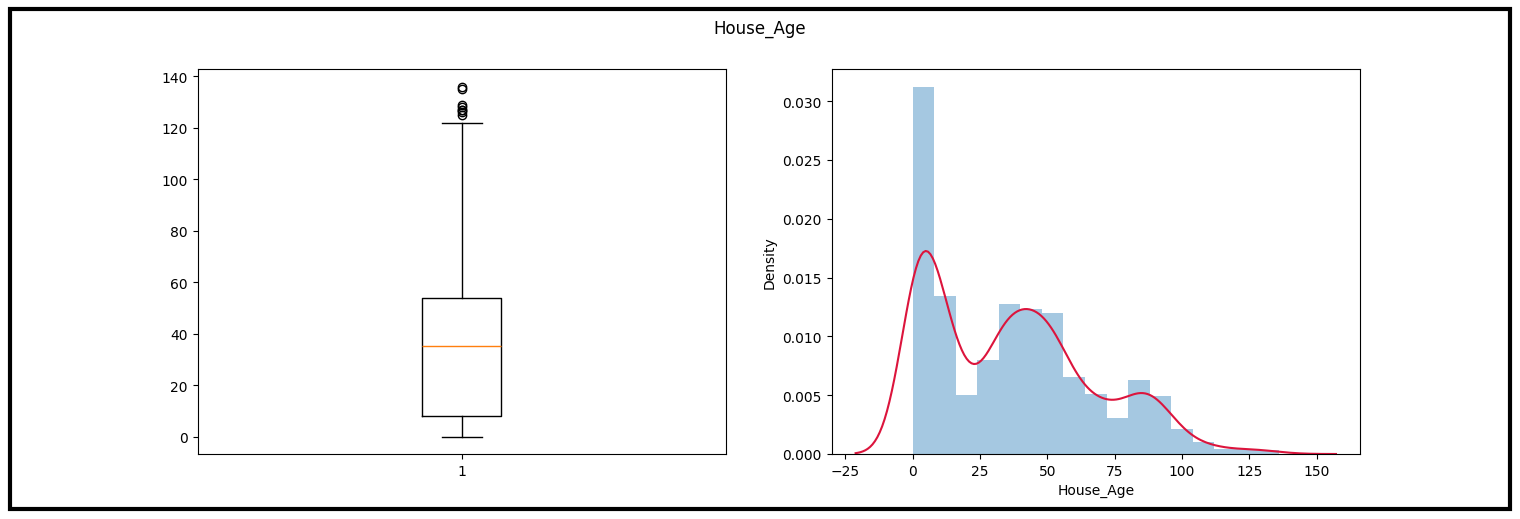

In [11]:
plot_hist_box(df_train.House_Age)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


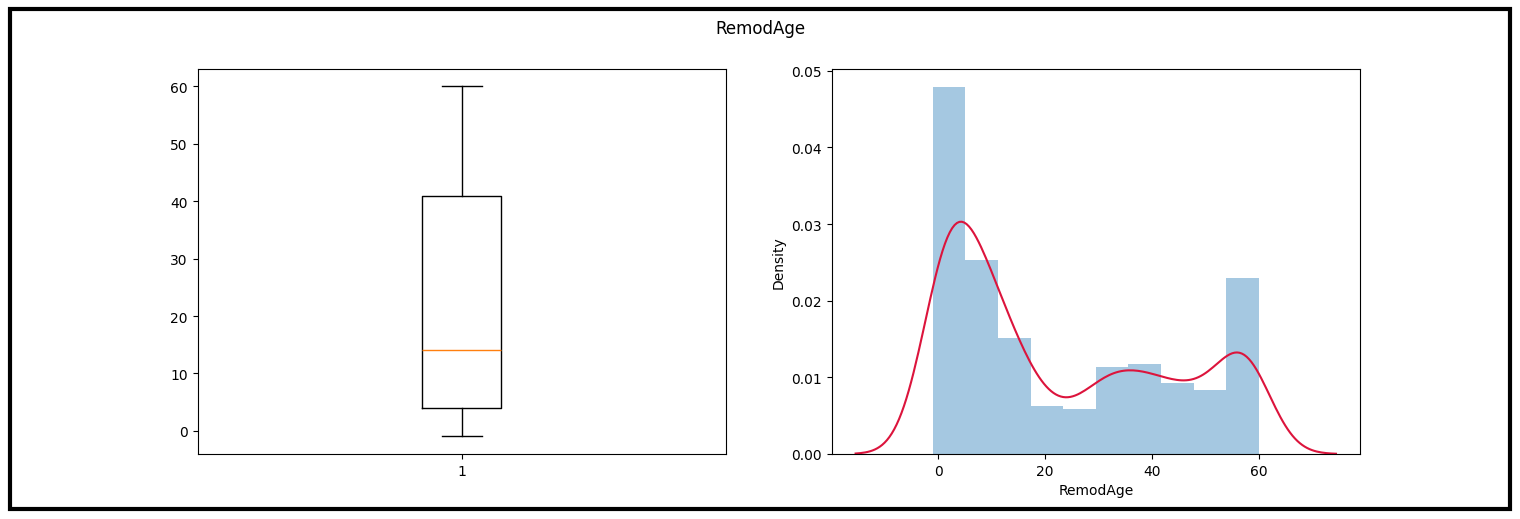

In [12]:
plot_hist_box(df_train.RemodAge)

In [13]:
df_test['House_Age'] = df_test.YrSold - df_test.YearBuilt
df_test['RemodAge'] = df_test.YrSold - df_test.YearRemodAdd
df_test.drop(labels=['YrSold', 'YearBuilt', 'YearRemodAdd'], inplace=True, axis=1)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\210790364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['House_Age'] = df_test.YrSold - df_test.YearBuilt
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\210790364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RemodAge'] = df_test.YrSold - df_test.YearRemodAdd
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\210790364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [14]:
df_train['Overall_Rating'] = (df_train.OverallCond + df_train.OverallQual) * 0.5
df_test['Overall_Rating'] = (df_test.OverallCond + df_test.OverallQual) * 0.5
df_train.drop(labels=['OverallQual', 'OverallCond'], inplace=True, axis=1)
df_test.drop(labels=['OverallQual', 'OverallCond'], inplace=True, axis=1)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1740926703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Overall_Rating'] = (df_train.OverallCond + df_train.OverallQual) * 0.5
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1740926703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Overall_Rating'] = (df_test.OverallCond + df_test.OverallQual) * 0.5
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1740926703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


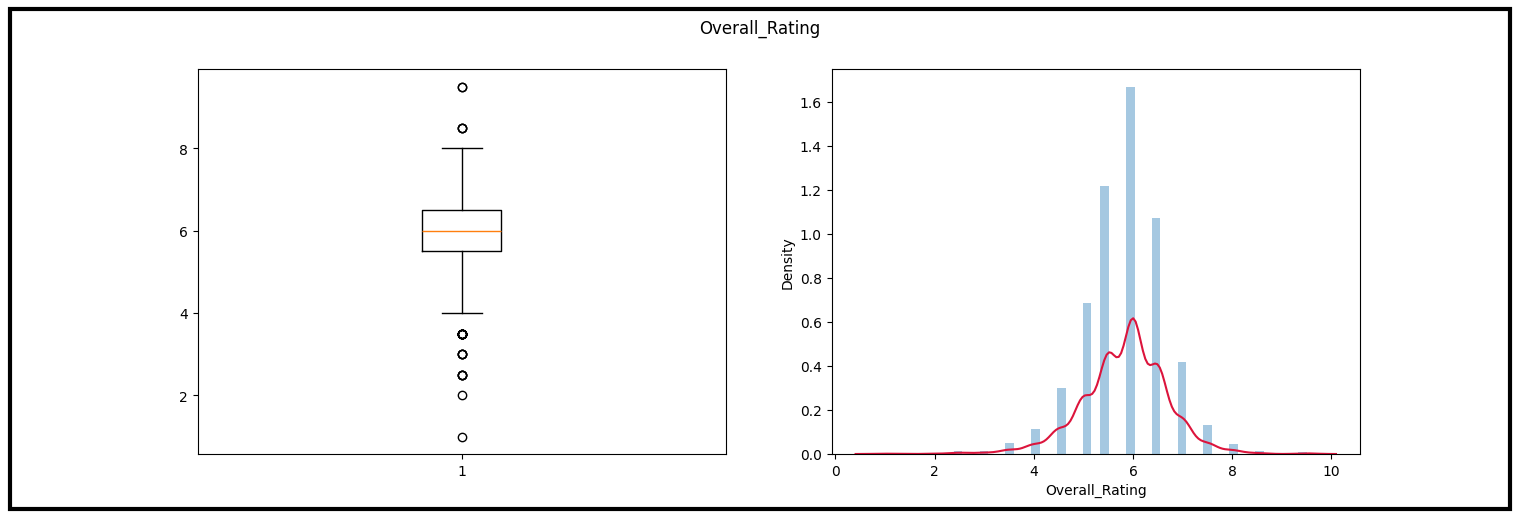

In [15]:
plot_hist_box(df_train.Overall_Rating)

In [16]:
train_data.Street.isnull().sum()
df_train['LotFrontage'] = train_data.LotFrontage
df_test['LotFrontage'] = train_data.LotFrontage

imputer =  KNNImputer(n_neighbors=2)
df_train.LotFrontage = imputer.fit_transform(df_train[['LotFrontage']])
df_test.LotFrontage = imputer.fit_transform(df_test[['LotFrontage']])

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1791129722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LotFrontage'] = train_data.LotFrontage
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1791129722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['LotFrontage'] = train_data.LotFrontage
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1791129722.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


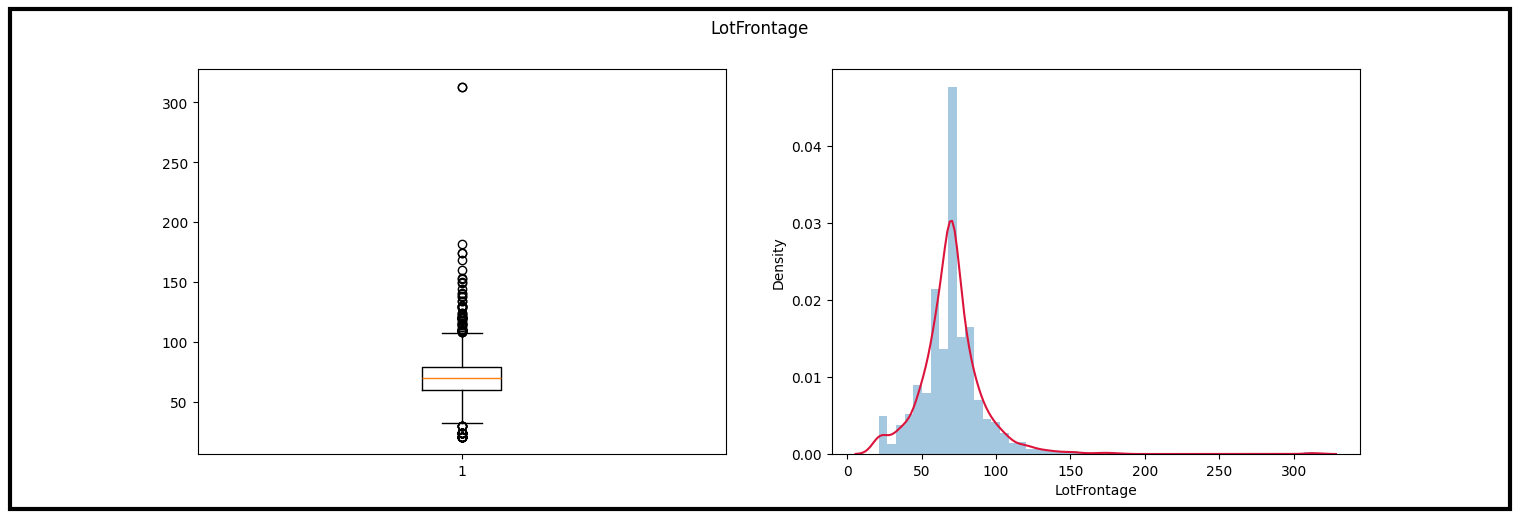

In [17]:
plot_hist_box(df_train.LotFrontage)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


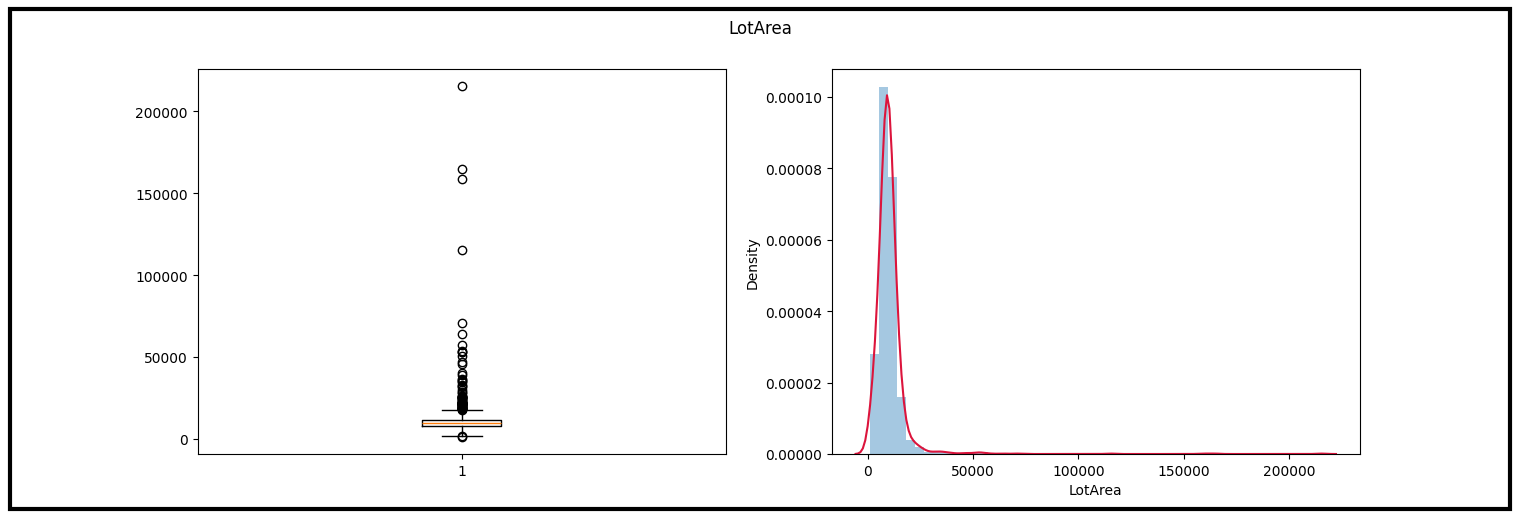

In [18]:
plot_hist_box(df_train.LotArea)

In [19]:
train_MS_label = set(df_train.MSSubClass.value_counts().index.tolist())
test_MS_label = set(df_test.MSSubClass.value_counts().index.tolist())
print(f"Additional data in test is {test_MS_label - train_MS_label}")

df_train = pd.get_dummies(df_train, columns=['MSSubClass'])
df_test = pd.get_dummies(df_test, columns=['MSSubClass'])

df_t_0_1 = [0]*df_train.shape[0]
df_0 = pd.DataFrame(df_t_0_1, columns=['MSSubClass_150'])
df_train = df_train.join(df_0)

Additional data in test is {150}


In [20]:
df_train.columns[df_train.dtypes != 0]

Index(['Id', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleCondition',
       'SalePrice', 'House_Age', 'RemodAge', 'Overall_Rating', 'LotFrontage',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_150'],
      dtype='object')

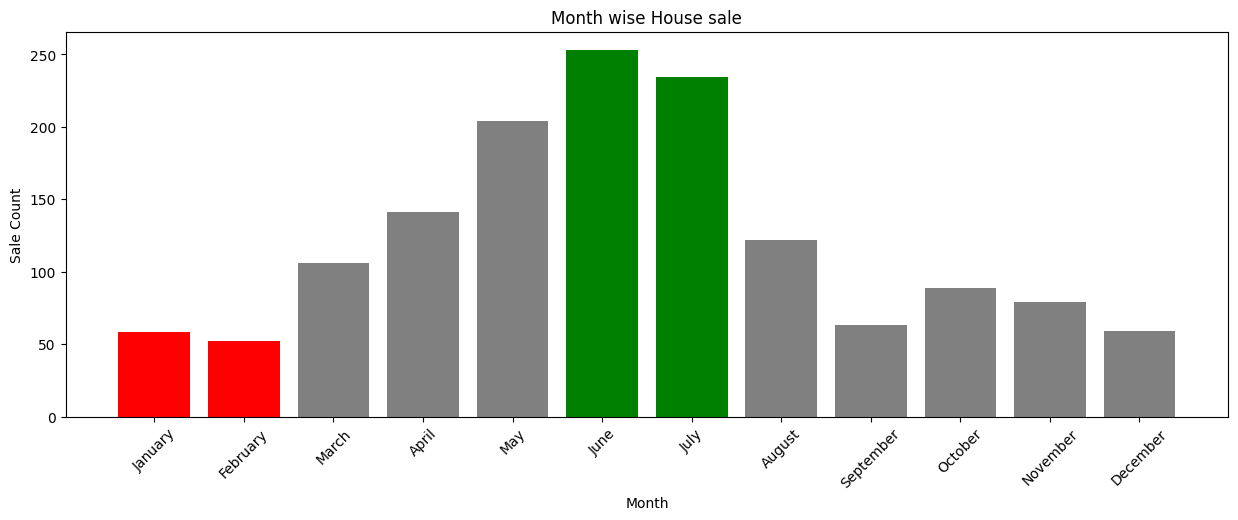

In [21]:
from calendar import month_name
from collections import OrderedDict

x = lambda x : datetime.date(1900, x, 1).strftime('%B')
month = list(map(x, df_train.MoSold.value_counts().index.to_list()))
sale_count = df_train.MoSold.value_counts().to_list()
month_sale = dict(zip(month, sale_count))
monthj = list(month_name)
monthj.remove('')
month_sale = OrderedDict([(a, month_sale[a]) for a in monthj])
plt.figure(figsize=(15,5))
colors = ['r', 'r', 'gray', 'gray', 'gray', 'g', 'g', 'gray', 'gray', 'gray', 'gray', 'gray']
plt.bar(month_sale.keys(), month_sale.values(), color=colors)
plt.title('Month wise House sale')
plt.xlabel('Month')
plt.ylabel('Sale Count')
plt.xticks(rotation=45)
plt.show()

In [22]:
df_train = pd.get_dummies(df_train, columns=['MoSold'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['MoSold'], drop_first=True)

In [23]:
df_train = pd.get_dummies(df_train,columns=['SaleCondition'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['SaleCondition'],drop_first=True)

In [24]:
label = {'None': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df_train.ExterQual.fillna('None', inplace=True)
df_test.ExterQual.fillna('None', inplace=True)
df_train.replace({'ExterQual': label}, inplace=True)
df_test.replace({'ExterQual': label}, inplace=True)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\329825655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.ExterQual.fillna('None', inplace=True)
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\329825655.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [25]:
df_train.ExterCond.fillna('None', inplace=True)
df_test.ExterCond.fillna('None', inplace=True)
df_train.replace({'ExterCond': label}, inplace=True)
df_test.replace({'ExterCond': label}, inplace=True)

df_train['External_QC'] = (df_train.ExterCond + df_train.ExterQual)*0.5
df_test['External_QC'] = (df_test.ExterCond + df_test.ExterQual)*0.5

df_train.drop(labels=['ExterQual','ExterCond'],inplace=True,axis=1)
df_test.drop(labels=['ExterQual','ExterCond'],inplace=True,axis=1)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3497547739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.ExterCond.fillna('None', inplace=True)
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3497547739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


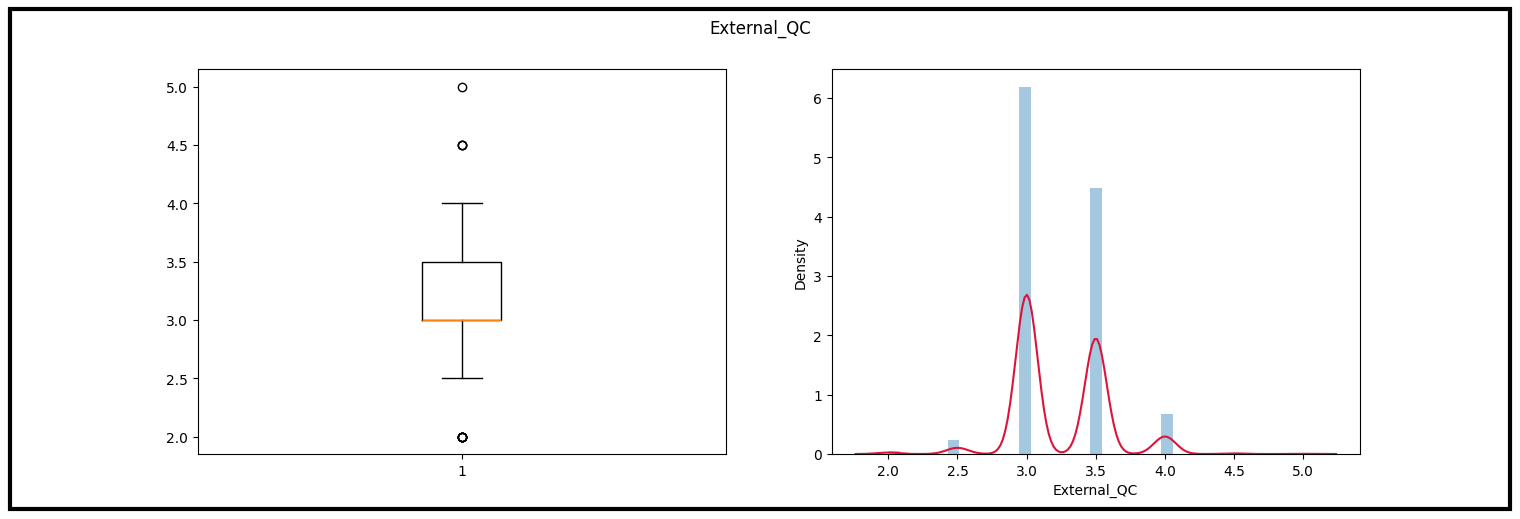

In [26]:
plot_hist_box(df_train.External_QC)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


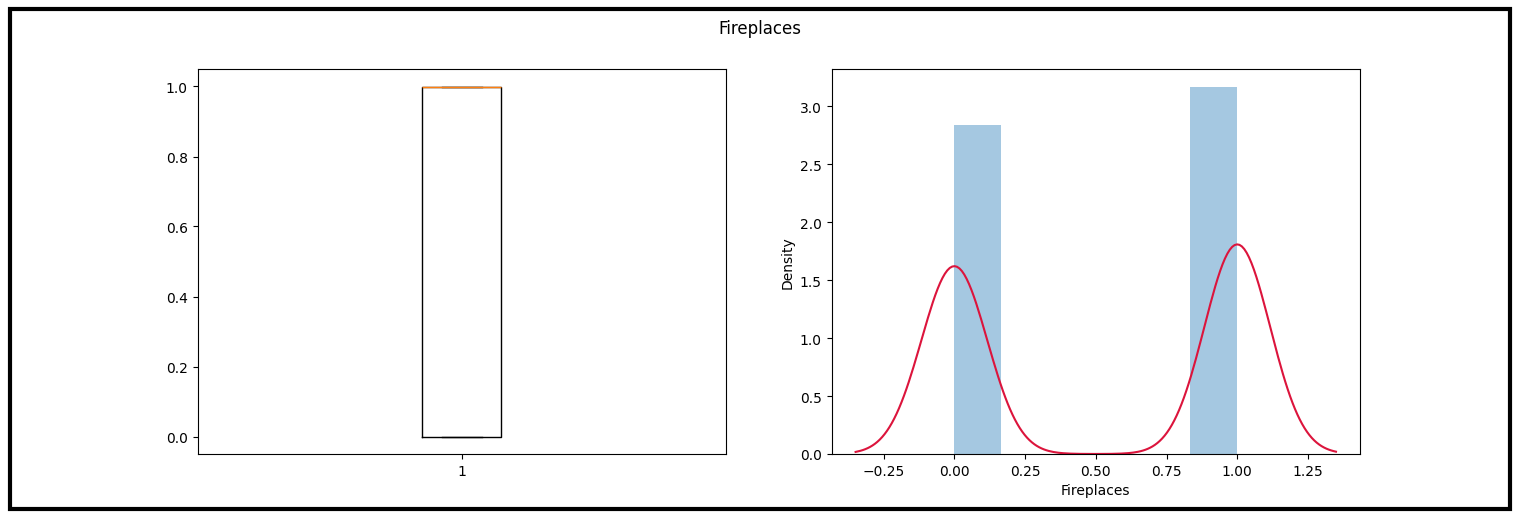

In [27]:
df_train.Fireplaces = (df_train.Fireplaces > 0).astype(int)
plot_hist_box(df_train.Fireplaces)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


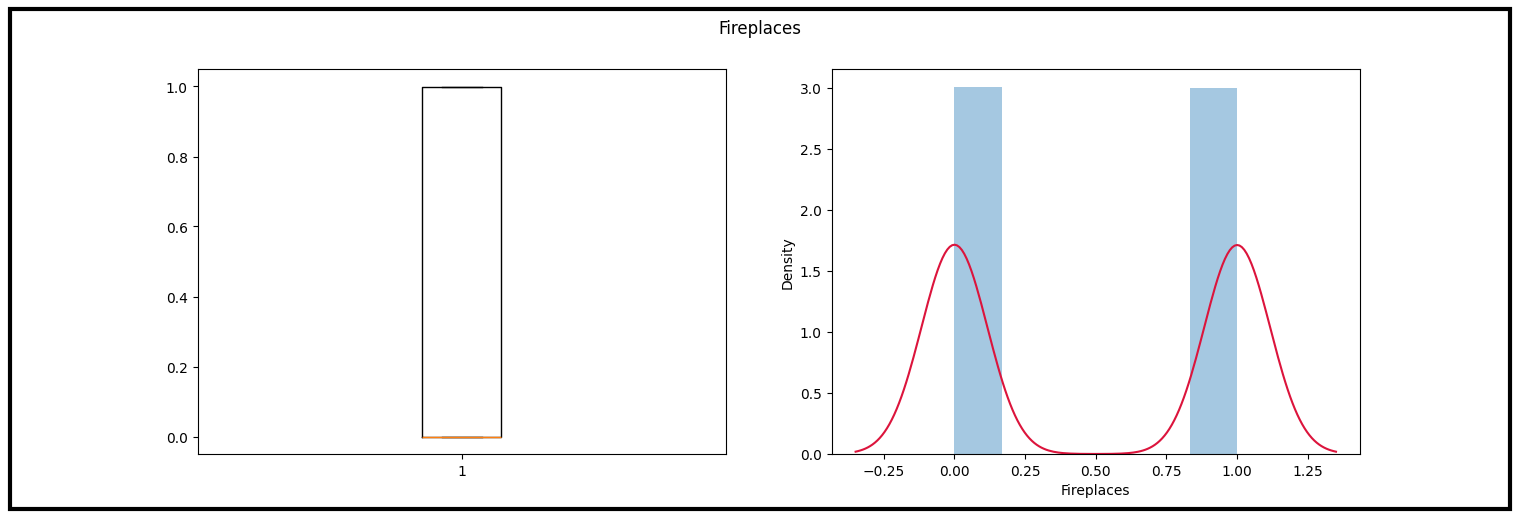

In [28]:
df_test.Fireplaces = (df_test.Fireplaces > 0).astype(int)
plot_hist_box(df_test.Fireplaces)

In [29]:
df_train['Street'].replace(['Pave', 'Grvl'], [0,1], inplace=True)
df_test['Street'].replace(['Pave', 'Grvl'], [0,1], inplace=True)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3369059576.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Street'].replace(['Pave', 'Grvl'], [0,1], inplace=True)
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3369059576.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\3602787827.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis[1] = sns.distplot(data)


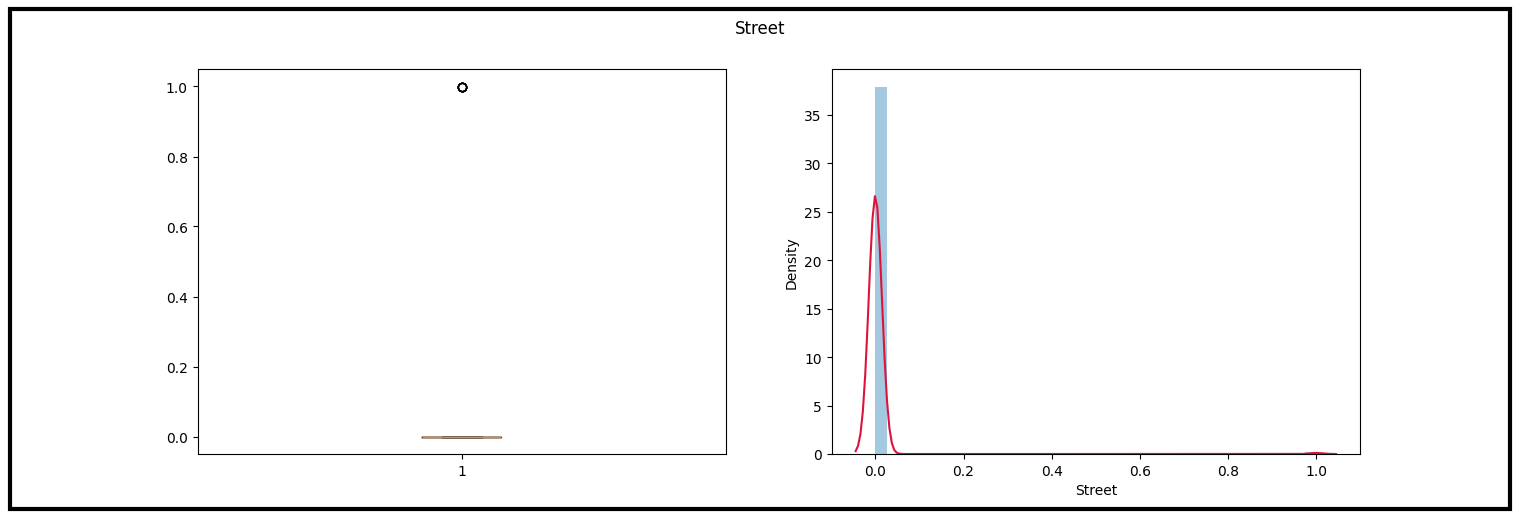

In [30]:
plot_hist_box(df_train.Street)

In [31]:
dum_var = ['LotShape','LandContour','LandSlope','LotConfig','Neighborhood','RoofStyle','PavedDrive','Foundation']

In [32]:
df_train = pd.get_dummies(df_train, columns=dum_var, drop_first=True)
df_test = pd.get_dummies(df_test, columns=dum_var, drop_first=True)

In [33]:
label = {'None':0,'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1}
df_train.HeatingQC.fillna('None',inplace=True)
df_test.HeatingQC.fillna('None',inplace=True)
df_train.replace({'HeatingQC':label},inplace=True)
df_test.replace({'HeatingQC':label},inplace=True)

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1691550944.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.HeatingQC.fillna('None',inplace=True)
C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\1691550944.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [34]:
drop_obj = df_train.columns[df_train.dtypes == '0'].to_list()
df_train.drop(labels=drop_obj, inplace=True, axis=1)
df_test.drop(labels=drop_obj, inplace=True ,axis=1)

In [35]:
df_train.fillna(0, inplace=True)

In [36]:
df_train['Fence'] = train_data.Fence
df_test['Fence'] = test_data.Fence
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [37]:
df_train.Fence = (df_train.Fence != 0).astype(int)
df_test.Fence = (df_test.Fence != 0).astype(int)

In [38]:
x = df_train.drop('SalePrice', axis=1)
y = df_train[['SalePrice']]
x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)
print(x.shape)
print(y.shape)

(1460, 114)
(1460, 1)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Training Data: ', x_train.shape[0])
print('Test Data: ', x_test.shape[0])

Training Data:  1168
Test Data:  292


In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
pred = model.predict(x_test)
pred_train = model.predict(x_train)

In [42]:
print(f"Mean absolute error of test data {mean_absolute_error(y_test, pred)}")
print(f"Mean absolute error of train data {mean_absolute_error(y_train, pred_train)}")
print(f"RMSE of test data {mean_squared_error(y_test, pred, squared=False)}")
print(f"RMSE of train data {mean_squared_error(y_train, pred_train, squared=False)}")
print(f"R^2 of test data {r2_score(y_test, pred)}")
print(f"R^2 of train data {r2_score(y_train, pred_train)}")

Mean absolute error of test data 21640.193002893626
Mean absolute error of train data 19094.83912243685
RMSE of test data 35444.99157735042
RMSE of train data 29831.112297100102
R^2 of test data 0.8362067800009289
R^2 of train data 0.8508026248046483


c:\Users\shivo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shivo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
res_df = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': pred.flatten()})
res_df['residual'] = res_df['Actual'] - res_df['Predicted']
res_df.head()

,Actual,Predicted,residual
0,154500,155205.718030,-705.718030
1,325000,323176.422149,1823.577851
2,115000,108653.453558,6346.546442
3,159000,172318.844192,-13318.844192
4,315500,277435.909411,38064.090589


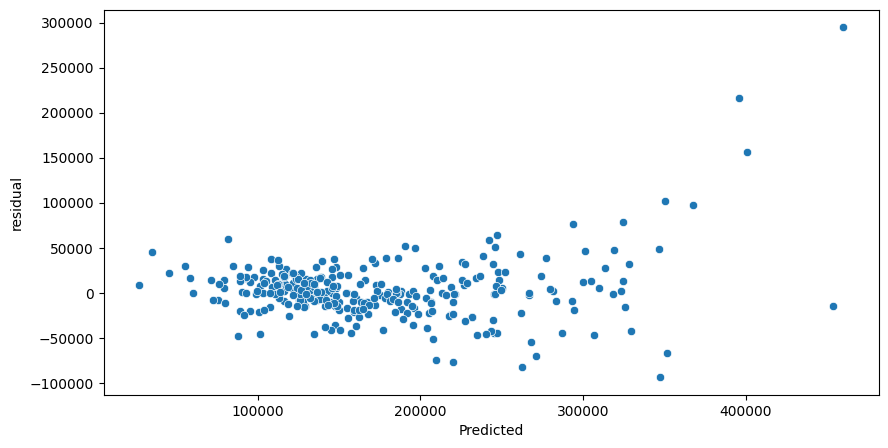

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=res_df['Predicted'], y=res_df['residual'])
plt.show()

C:\Users\shivo\AppData\Local\Temp\ipykernel_6460\4154264072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(res_df['residual'])


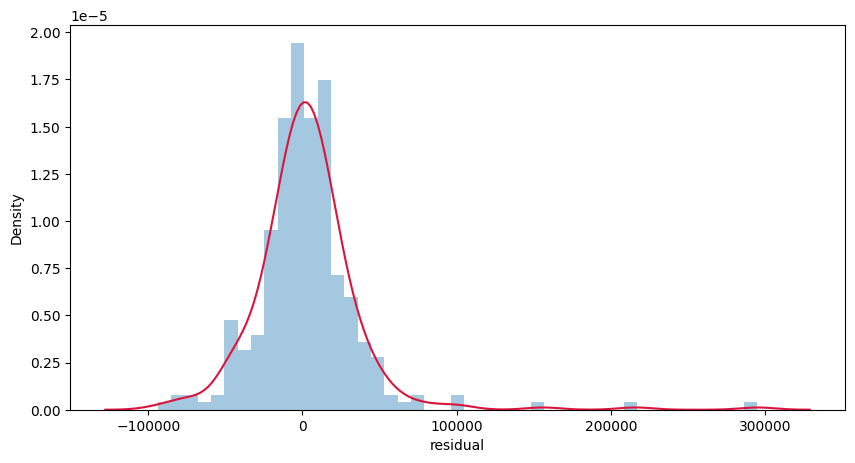

In [45]:
plt.figure(figsize=(10,5))
ax = sns.distplot(res_df['residual'])
ax.lines[0].set_color('crimson')
plt.show()